# Data exploration

In [4]:
from plants_sm.data_structures.dataset import PandasDataset
from plants_sm.unsupervised.pca import SklearnPCA
from sklearn.preprocessing import StandardScaler
from plants_sm.unsupervised.tsne import SklearnTSNE
import numpy as np
from plants_sm.featurization.propythia import PropythiaWrapper

In [3]:
dataset = PandasDataset(labels_field=["union class", "Aracyc class"], representation_field="sequence_test",
                        instances_ids_field="gene")

In [4]:
dataset.from_csv("../data/dados.csv")

In [5]:
dataset.instances

array(['MDMSSMAGSIGVSVAVLRFLLCFVATIPVSFACRIVPSRLGKHLYAAASGAFLSYLSFGFSSNLHFLVPMTIGYASMAIYRPKCGIITFFLGFAYLIGCHVFYMSGDAWKEGGIDSTGALMVLTLKVISCSMNYNDGMLKEEGLREAQKKNRLIQMPSLIEYFGYCLCCGSHFAGPVYEMKDYLEWTEGKGIWDTTEKRKKPSPYGATIRAILQAAICMALYLYLVPQYPLTRFTEPVYQEWGFLRKFSYQYMAGFTARWKYYFIWSISEASIIISGLGFSGWTDDASPKPKWDRAKNVDILGVELAKSAVQIPLVWNIQVSTWLRHYVYERLVQNGKKAGFFQLLATQTVSAVWHGLYPGYMMFFVQSALMIAGSRVIYRWQQAISPKMAMLRNIMVFINFLYTVLVLNYSAVGFMVLSLHETLTAYGSVYYIGTIIPVGLILLSYVVPAKPSRPKPRKEE',
       'MMKVVSPRTRSDSITEKVFRRVYSNFNISTVEDEYIHRQRSSDYEKESRLRKRGLEDKEEVMEMEQMGAERIKTVLILMSDTGGGHRASAEAIRDAFKIEFGDDYRIIIKDVWKEYTGWPLNDMERQYKFMVKHVGLWSVAFHGTSPKWIHKSYLSALAAYYAKEIEAGLMEYKPDIIISVHPLMQHIPLWVMKWQGLHKKVIFVTVITDLNTCHRTWFHHGVSRCYCPSKEVAKRALVDGLDDSQIRVFGLPVRPSFPRTILNKNELRKELEIDLNLPAVLLMGGGEGMGPVQKTALALGDSLYNSKESNPIGQLIVICGRNKVLASTLASHEWKIPVKVRGFETQMEKWMGACDCIITKAGPGTIAEALICGLPIILNDYIPGQEKGNVPYVVDNGAGVFTRSPKETAKIVADWFSNNKEELKKMSENALKLSQPEAVFDIVKDIHHLSQQQQRIPLFNEFSY',
       'MATKRSVGTLKEADLKGKSVFVRVDLNVPLDDNSNITDDTRIR

In [6]:

wrapper = PropythiaWrapper(descriptor="get_all", n_jobs=8, tricomp=True)
wrapper.featurize(dataset)

In [7]:
dataset.to_csv("../data/dados_propythia_tricomp.csv")

True

In [5]:
dataset2 = PandasDataset(labels_field=["union class", "Aracyc class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene")

In [6]:
dataset2.from_csv("../data/dados.csv")
wrapper = PropythiaWrapper(descriptor="get_all", n_jobs=8, tricomp=False)
wrapper.featurize(dataset2)
dataset2.to_csv("../data/dados_propythia.csv")

True

/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/dask/core.py:119: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


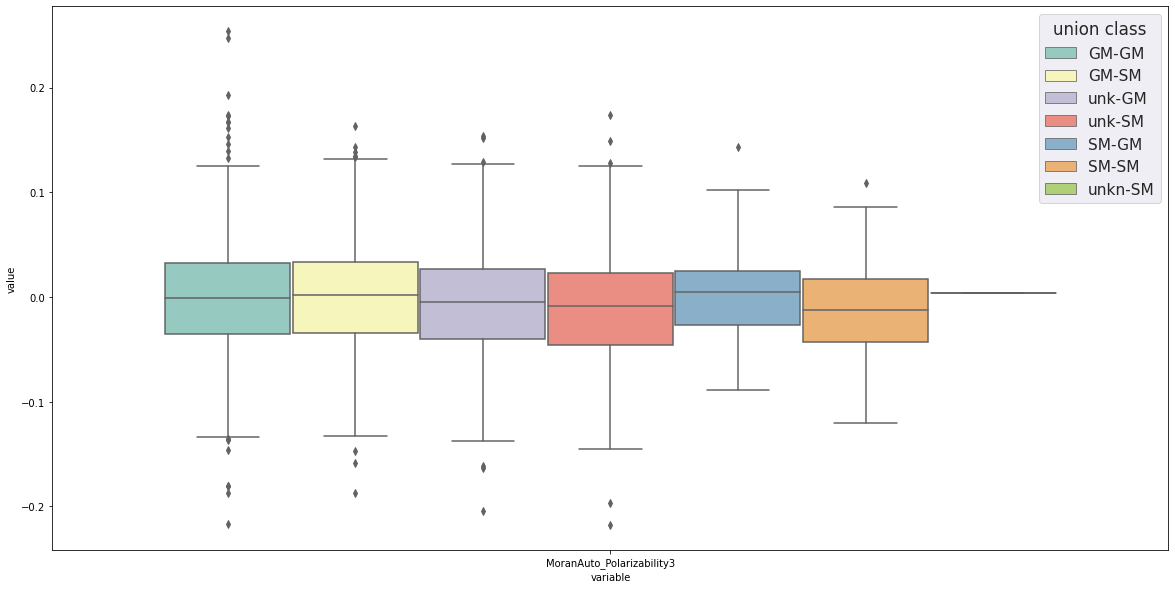

In [7]:
from plants_sm.data_exploration.boxplot import Boxplot

dataset2 = PandasDataset(labels_field=["union class", "Aracyc class"],
                         representation_field="sequence_test",
                         instances_ids_field="gene", features_fields=slice(8, None))

dataset2.from_csv("../data/dados_propythia.csv")

boxplot = Boxplot(title=("", 25), orientation="v", pallete="Set3")
boxplot.generate(features_name=["MoranAuto_Polarizability3"], dataframe=dataset2.dataframe, label_name="union class")

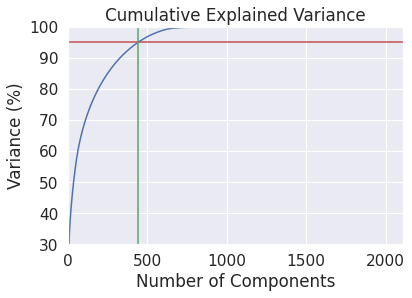

First 2 PC: 15.913049253598418
First 442 PC: 95.01267552998772


In [9]:
#scale of the data
scaler = StandardScaler()
data = scaler.fit_transform(np.array(dataset2.features))

# Load Data
pca = SklearnPCA(n_components = 2107)

# Transform the data
df_pca = pca.fit_transform(data)

pca.generate_pca_variance_plot()

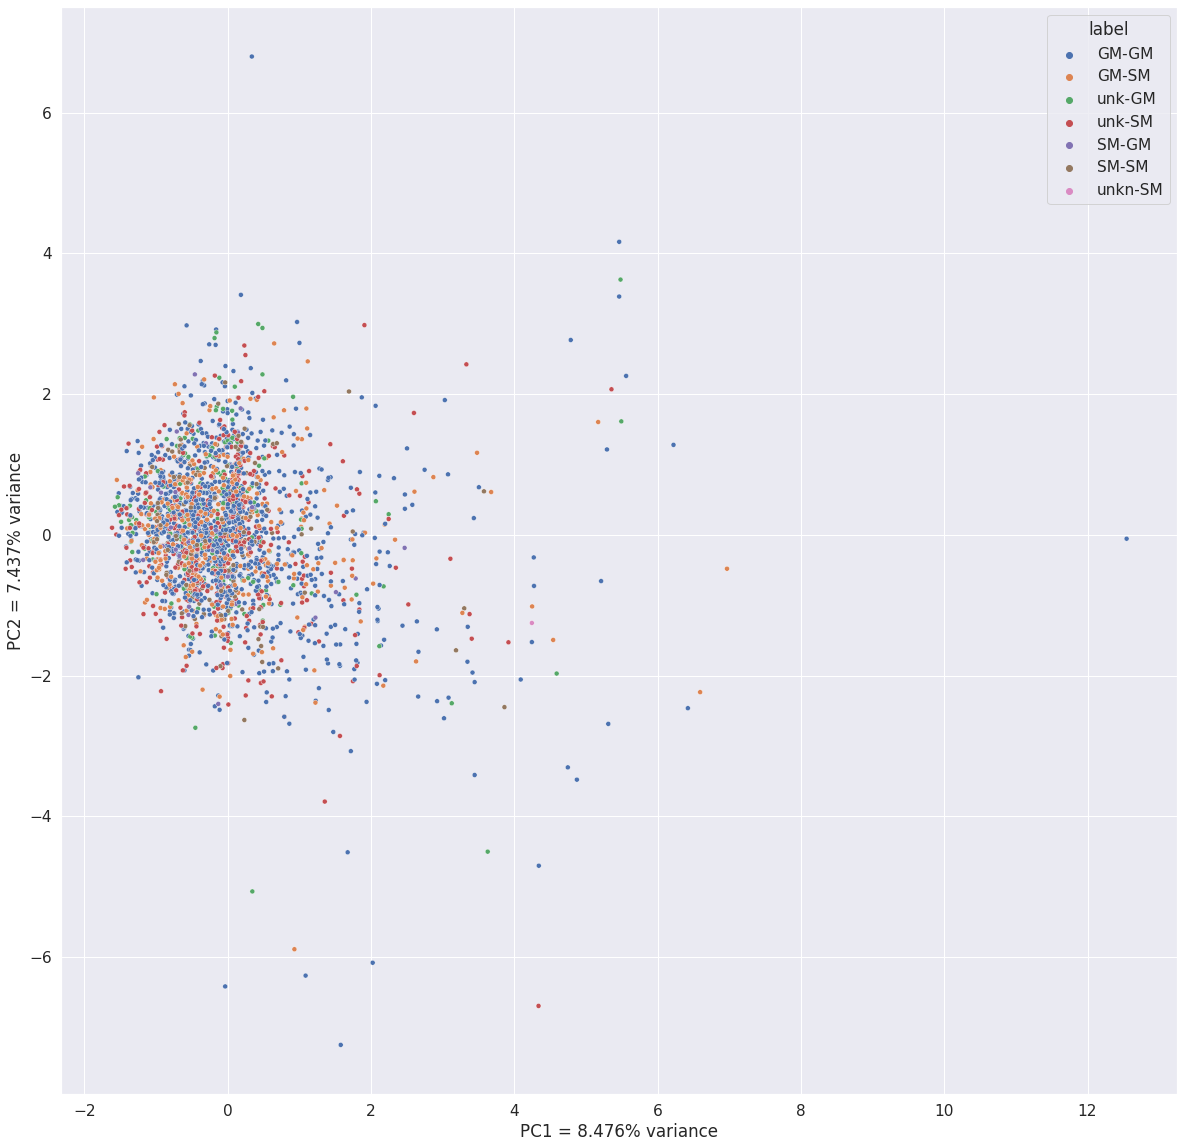

In [10]:
pca.generate_dotplot(data, dataset2.labels[:, 0])

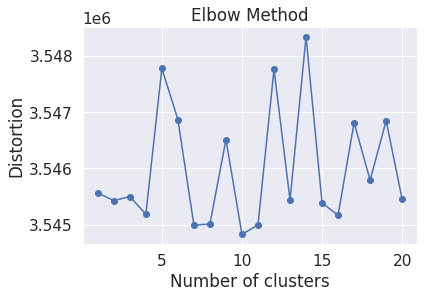

In [11]:
from plants_sm.unsupervised.kmeans import SklearnKMeans

kmeans = SklearnKMeans(n_clusters=5)

kmeans.generate_distortion_graph(df_pca)

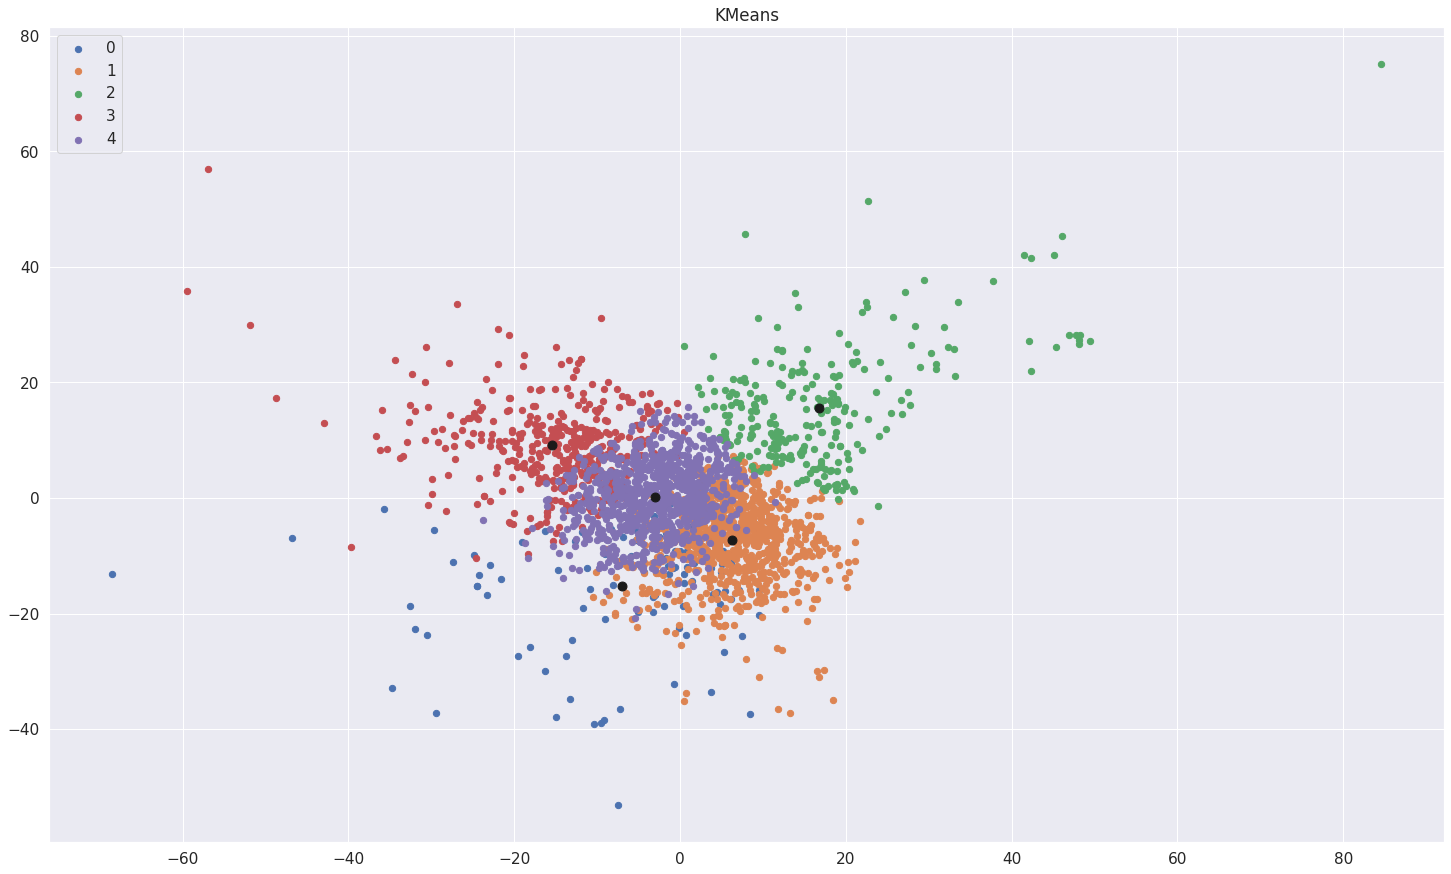

In [12]:
descriptors_kmeans = kmeans.fit_transform(df_pca)
kmeans.fit_predict_generate_scatter_plot(df_pca)

/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/joao/anaconda3/envs/PlantsSM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'TSNE'}, xlabel='t-SNE 1', ylabel='t-SNE 2'>

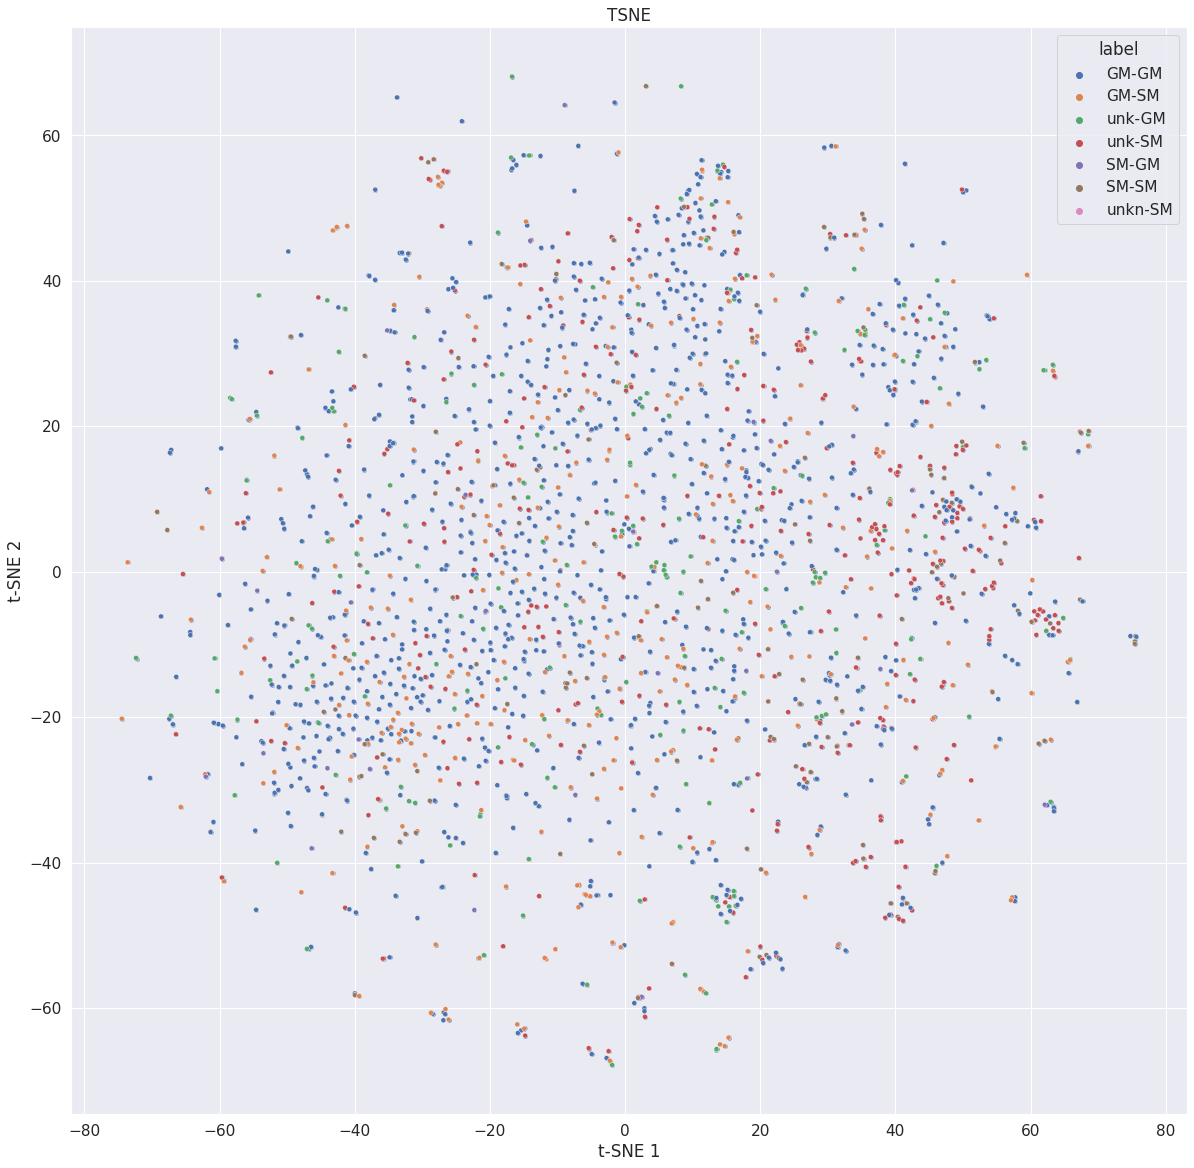

In [14]:
scaler = StandardScaler()
data = scaler.fit_transform(dataset2.features)

tsne = SklearnTSNE()
tsne_data = tsne.fit_transform(data)
tsne.generate_dotplot(tsne_data, dataset2.labels[:, 0])